# Advantage or Offset

In DnD many things are decided by rolling a 20 sided dice and leaving fate to probabilities.

One can increase their 'luck' with by adding items, skills, spells, or buffs which add a fixed offset to the d20 roll. For example, based on my class as a Rogue I might be extremely dexterous giving me a constant +3 bonus in addition to whatever I roll on the d20. One can easily see that this gives me an extra 3/20 chance of beating the minimum necessary roll (DC) to be sneaky and not detected.

Other items or skills might give me 'advantage' on rolls. This simply means I roll 2 d20's and take the higher value. This gives an extra chance to win, but the by what amount is not immediately apparent, as it changes the underlying probability distribution.

How much advantage does the advantage mechanic give you? Should one seek to increase their base stats or find ways to gain advantage? Let's find out!

In [70]:
import numpy as np
import matplotlib.pyplot as plt

In [71]:
rng = np.random.default_rng()

In [72]:
def roll_dice(n_throws=10000, n_dice=1, n_sides=6):
    result = []
    for i in range(n_dice):
        # here rng.integers calls the random number generator to pull integers from a uniform distribution
        result.append(rng.integers(low = 1, high = n_sides, size = n_throws, endpoint=True))
    
    return result

In [73]:
print(roll_dice(n_throws=10, n_dice=2))

[array([4, 4, 1, 2, 1, 1, 2, 2, 1, 4]), array([1, 3, 4, 1, 4, 2, 5, 5, 5, 1])]


## Offset

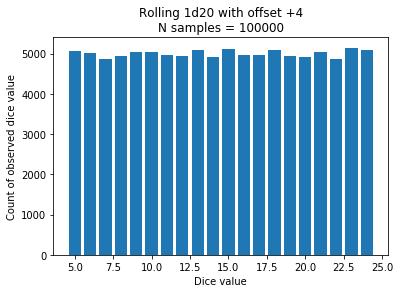

In [82]:
max_val = n_sides = 20
offset = 4
n_throws = 100000
offset_rolls = [roll+offset for roll in roll_dice(n_throws, n_sides=n_sides)]
histo, edges = np.histogram(offset_rolls, bins=np.arange(1+offset,(max_val+ offset + 2)))
# plot histogram
plt.bar(edges[:max_val], histo)
plt.title(f'Rolling 1d20 with offset +{offset}\nN samples = {n_throws}')
plt.xlabel('Dice value')
plt.ylabel('Count of observed dice value')
plt.show()

Rolling 1d20 gives the expected uniform distribution. Adding an offset simply pushes this uniform distribution to the right.

## Advantage

In [76]:
def pick_advantage(rolls):
    '''expects a 2d array'''
    return [max(rolls[0][i], rolls[1][i]) for i in range(len(rolls[0]))]

In [78]:
rolls = roll_dice(n_throws=10, n_dice=2)
print(rolls)
print(pick_advantage(rolls))

[array([6, 4, 3, 1, 3, 4, 1, 2, 3, 2]), array([3, 5, 5, 5, 5, 6, 6, 4, 3, 4])]
[6, 5, 5, 5, 5, 6, 6, 4, 3, 4]


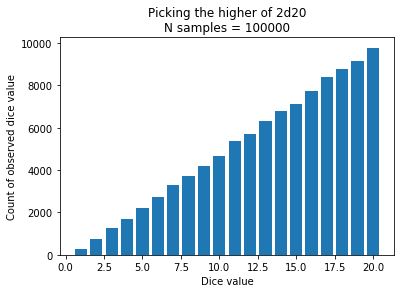

In [83]:
max_val = n_sides = 20
n_throws=100000
advantage_rolls = pick_advantage(roll_dice(n_throws, n_sides=n_sides, n_dice=2))
histo, edges = np.histogram(advantage_rolls, bins=np.arange(1,(max_val + 2)))
# plot histogram
plt.bar(edges[:max_val], histo)
plt.title(f'Picking the higher of 2d20\nN samples = {n_throws}')
plt.xlabel('Dice value')
plt.ylabel('Count of observed dice value')
plt.show()

Picking the higher of two dice gives a skewed distribution. Rolling a 20 has the highest probability, and decreases linearlly with lower dice rolls. 

## Comparing the Two

In [93]:
n_sides = 20
offset = 0
n_throws = 100000
offset_rolls = [roll+offset for roll in roll_dice(n_throws, n_sides=n_sides)]
advantage_rolls = pick_advantage(roll_dice(n_throws, n_sides=n_sides, n_dice=2))

a_s = np.std(advantage_rolls)
a_m = np.mean(advantage_rolls)
o_s = np.std(offset_rolls)
o_m = np.mean(offset_rolls)
diff = a_m - o_m

print(f'Advantage: mean:{a_m:.2f}, std:{a_s:.2f}')
print(f'Offset +{offset}: mean:{o_m:.2f}, std:{o_s:.2f}')
print(f'difference in mean: {diff:.2f}')

Advantage: mean:13.82, std:4.72
Offset +0: mean:10.49, std:5.76
difference in mean: 3.33


## Conclusion

Advantage is definltely useful for increases your chances of a favorable outcome. On average it increases the mean value of your dice roll by 3.33. In addition it tightens up the standard deviation, so you can be more sure that your roll fa